# **Proyecto de Data Science Aplicada al Predicci√≥n de Enfermedades Card√≠acas**
**Autor:** Gaggiamo, Matias Andres

*Un proyecto de an√°lisis y modelado predictivo a partir de datos m√©dicos p√∫blicos, con aplicaciones potenciales en sistemas de apoyo a la decisi√≥n cl√≠nica.*

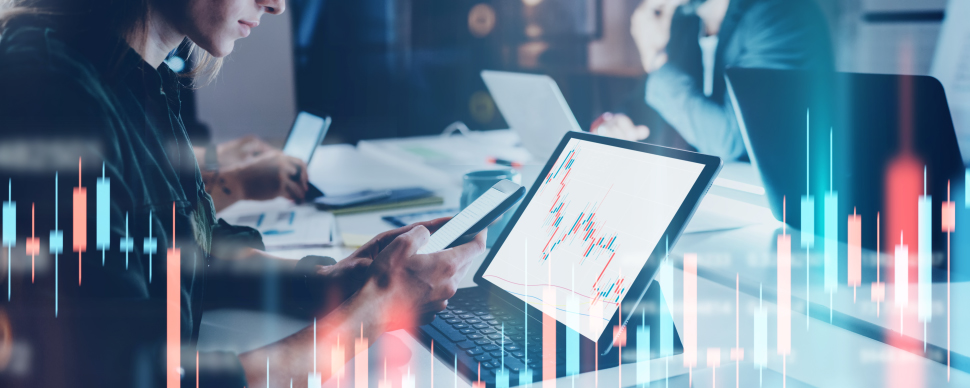

## 0. Introducci√≥n

Este trabajo final fue desarrollado como parte del curso de Data Science dictado por la Facultad Regional Buenos Aires de la Universidad Tecnol√≥gica Nacional (UTN FRBA). Como estudiante avanzado de la carrera de Bioingenier√≠a de la Facultad de Ingenier√≠a de la Universidad Nacional de Entre R√≠os (FI-UNER), este proyecto represent√≥ una oportunidad para integrar mis conocimientos en ingenier√≠a biom√©dica con herramientas de an√°lisis de datos aplicadas a desafi√≥s reales del √°mbito de la salud.

El objetivo principal del trabajo fue analizar un conjunto de datos m√©dicos vinculados a par√°metros cardiovasculares y desarrollar un modelo de machine learning capaz de estimar la presencia o ausencia de enfermedades card√≠acas. La elecci√≥n del tema responde al impacto cr√≠tico de las enfermedades cardiovaculares, una de las principales causas de mortalidad a nivel mundial, y al creciente rol que tienen los datos en mejorar la toma de decisiones cl√≠nicas.

A lo largo del desarrollo, se aplicaron t√©cnicas de preprocesamiento, an√°lisis exploratorio de datos (EDA), selecci√≥n de variables y modelado predictivo, utilizando Python y sus librer√≠as principales en ciencia de datos. El enfoque fue orientado a la reproducibilidad, la interpretaci√≥n cl√≠nica de los resultados y su aplicabilidad a entornos reales.

El presente informe presenta en detalle cada etapa del proceso, desde la definici√≥n del problema y el an√°lisis del dataset, hasta la implementaci√≥n y evaluaci√≥n del modelo junto a la interpretaci√≥n de los resultados. Asimismo, se proponen posibles aplicaciones del modelo en entornos cl√≠nicos y se identifican l√≠neas futuras de trabajo. Este proyecto refleja mi inter√©s en el cruce entre tecnolog√≠a, datos y salud, y constituye un primer paso hacia mi desarrollo profesional en el √°rea de salud digital.

## 1. Inicio: Carga y Contexto del dataset

### 1.1 Carga del data set



El dataset utilizado en este proyecto proviene del repositorio p√∫blico "UCI Machine Learning Repository", y corresponde al dataset "Statlog (Heart) Dataset". Este incluye mediciones cl√≠nicas de pacientes, con el objetivo de predecir la presencia o ausencia de una enfermedad card√≠aca.

*Aclaraci√≥n: el archivo descargado se encontraba en formato ".dat", por lo que se realiz√≥ una conversi√≥n a ".csv" para facilitar su an√°lisis en Python*

In [268]:
# Importaci√≥n de librer√≠as necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Monta Google Drive en el entorno de Colab
# from google.colab import drive
# drive.mount('/content/drive')

from pathlib import Path
import os, warnings

warnings.filterwarnings("ignore")
sns.set_theme(context="notebook", style="whitegrid")

def find_project_root(start: Path) -> Path:
    for p in [start, *start.parents]:
        if (p / ".git").exists() or (p / "data").exists():
            return p
    return start
PROJECT_ROOT = find_project_root(Path.cwd())
os.chdir(PROJECT_ROOT)
DATA_DIR = PROJECT_ROOT / "data"
DATA_DIR.mkdir(exist_ok=True)

print("Working dir: ", PROJECT_ROOT)
print("DATA_DIR   :", DATA_DIR)

Working dir:  c:\Users\matia\Proyectos\ml-heart-disease-prediction
DATA_DIR   : c:\Users\matia\Proyectos\ml-heart-disease-prediction\data


In [269]:
import pandas as pd, re

CSV_PATH = DATA_DIR / "heart.csv"
DAT_PATH = DATA_DIR / "heart.dat"

# Asignaci√≥n de nombres a las columnas, seg√∫n la documentaci√≥n del dataset
COLS = ["age", "sex", "chest-pain", "rest-bp",
              "serum-chol", "fasting-blood-sugar", "ecg",
              "max-heart-rate", "angina", "oldpeak",
              "slope", "major-vessels", "thal", "heart-disease"]

def load_heart(prefer_csv= True):
    if prefer_csv and CSV_PATH.exists():
        df = pd.read_csv(CSV_PATH)
        print(f"Cargado CSV: {CSV_PATH.relative_to(PROJECT_ROOT)} | shape={df.shape}")
    
    if DAT_PATH.exists():
        try:
            df = pd.read_csv(DAT_PATH, sep=r"\s+|,", engine="python", header=None)
        except Exception:
            rows = []
            with open(DAT_PATH, 'r', encoding='utf-8', errors='ignore') as f:
                for line in f:
                    parts = re.split(r"\s+", line.strip())
                    rows.append(parts)
                df = pd.DataFrame(rows)
        
        df = df.iloc[:, :14]
        df.columns = COLS
        for c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="ignore")

        df.to_csv(CSV_PATH, index = False)
        print(f"Cargado DAT y generado CSV: {CSV_PATH.relative_to(PROJECT_ROOT)}  | shape={df.shape}")
        return df
    
    raise FileNotFoundError("No se encontr√≥ data/heart.csv ni data/heart.dat. Copi√° uno de ellos a 'data/'.")
    
df = load_heart(prefer_csv = True)
df.head()

Cargado CSV: data\heart.csv | shape=(270, 14)
Cargado DAT y generado CSV: data\heart.csv  | shape=(270, 14)


age  sex  chest-pain  rest-bp  serum-chol  fasting-blood-sugar  ecg  \
0  70.0  1.0         4.0    130.0       322.0                  0.0  2.0   
1  67.0  0.0         3.0    115.0       564.0                  0.0  2.0   
2  57.0  1.0         2.0    124.0       261.0                  0.0  0.0   
3  64.0  1.0         4.0    128.0       263.0                  0.0  0.0   
4  74.0  0.0         2.0    120.0       269.0                  0.0  2.0   

   max-heart-rate  angina  oldpeak  slope  major-vessels  thal  heart-disease  
0           109.0     0.0      2.4    2.0            3.0   3.0              2  
1           160.0     0.0      1.6    2.0            0.0   7.0              1  
2           141.0     0.0      0.3    1.0            0.0   7.0              2  
3           105.0     1.0      0.2    2.0            1.0   7.0              1  
4           121.0     1.0      0.2    1.0            1.0   3.0              1

‚ö†Ô∏è Si est√°s ejecutando este notebook en Google Colab, asegurate de montar Google Drive para acceder al archivo con:
```python
from google.colab import drive
drive.mount('/content/drive')

### 1.2 Diccionario de variables

| N¬∫ | **Variable**             | **Descripci√≥n**                                                                 | **Tipo**       | **Valores posibles**                            |
|----|--------------------------|---------------------------------------------------------------------------------|----------------|--------------------------------------------------|
| 1  | `age`                    | Edad del paciente                                                               | Continua       | A√±os (n√∫mero real)                              |
| 2  | `sex`                    | Sexo del paciente                                                               | Binaria        | 1 = Hombre, 0 = Mujer                           |
| 3  | `chest-pain`             | Tipo de dolor de pecho                                                          | Categ√≥rica     | 1 = Angina t√≠pica, 2 = At√≠pica, 3 = No angina, 4 = Asintom√°tico |
| 4  | `rest-bp`                | Presi√≥n arterial en reposo                                                      | Continua       | mmHg (n√∫mero real)                              |
| 5  | `serum-chol`             | Nivel de colesterol en sangre                                                   | Continua       | mg/dl (n√∫mero real)                             |
| 6  | `fasting_blood_sugar`    | Az√∫car en sangre en ayunas > 120 mg/dl                                          | Binaria        | 1 = Verdadero, 0 = Falso                        |
| 7  | `ecg`                    | Resultados del electrocardiograma en reposo                                     | Categ√≥rica     | 0 = Normal, 1 = Anomal√≠a ST/T, 2 = Hipertrofia ventricular (criterio de Estes) |
| 8  | `max-heart-rate`         | M√°xima frecuencia card√≠aca alcanzada durante el ejercicio                       | Continua       | Latidos por minuto (n√∫mero real)               |
| 9  | `angina`                 | Presencia de angina inducida por el ejercicio                                   | Binaria        | 1 = S√≠, 0 = No                                  |
| 10 | `oldpeak`                | Depresi√≥n del segmento ST respecto al estado de reposo                          | Continua       | mV (n√∫mero real)                                |
| 11 | `slope`                  | Pendiente del segmento ST en esfuerzo m√°ximo                                    | Categ√≥rica     | 1 = Ascendente, 2 = Plana, 3 = Descendente      |
| 12 | `major_vessels`          | N√∫mero de vasos principales coloreados mediante fluoroscop√≠a                    | Categ√≥rica     | 0, 1, 2, 3                                      |
| 13 | `thal`                   | Tipo de defecto detectado en estudio de talio                                   | Categ√≥rica     | 3 = Normal, 6 = Defecto fijo, 7 = Defecto reversible |
| 14 | `heart_disease`          | Diagn√≥stico de enfermedad card√≠aca (variable objetivo)                          | Categ√≥rica     | 1 = Ausencia, 2 = Presencia                     |

### 1.3 Contexto del t√≥pico elegido

Como estudiante de Bioingenier√≠a con inter√©s en el an√°lisis de datos biom√©dicos, he decidido centrar este proyecto en la detecci√≥n temprana y predicci√≥n de enfermedades card√≠acas. Se trata de un problema de gran relevancia sanitaria, ya que las enfermedes cardiovasculares representan una de las principales causas de morbilidad y mortalidad a nivel global.

El prop√≥sito de este trabajo es aplicar las tecnolog√≠as de la informaci√≥n y herramientas propias de la ciencia de datos para analizar grandes vol√∫menes de datos cl√≠nicos, con el objetivo de identificar patrones significativos y construir modelos predictivos. Estos modelos podr√≠na contribuir a mejorar la capacidad diagn√≥stica del sistema de salud, facilitando la detecci√≥n temprana de estas patolog√≠as y promoviendo una atenci√≥n m√©dica m√°s eficiente y personalizada.

Este proyecto se alinea con mi objetivo a largo plazo de integrar la bioingenier√≠a con el anal√≠sis de datos para abordar problemas reales en el √°mbito de la salud. Aspiro a desarrollar soluciones innovadoras que respalden la toma de decisiones cl√≠nicas y optimicen la gesti√≥n de recursos m√©dicos.

üéØ**Objetivos**:
- Describir y analizar la relaci√≥n entre variables m√©dicas y la presencia de enfermedades card√≠acas.
- Desarrollar un modelo predictivo capaz de clasificar a los pacientes como "enfermos" o "no enfermos" a partir de par√°metros m√©dicos.
- Identificar los factores con mayor peso en la predicci√≥n, como tipo de dolor en el pecho, la depresi√≥n del segmento ST, o el n√∫mero de vasos principales coloreados por fluoroscop√≠a.

## 2. Exploraci√≥n y Visualizaci√≥n (EDA)

### 2.1 Exploraci√≥n inicial

Para tener un primer vistazo del conjunto de datos, se utilizan algunos comandos fundamentales de Pandas:


In [270]:
df.head()

age  sex  chest-pain  rest-bp  serum-chol  fasting-blood-sugar  ecg  \
0  70.0  1.0         4.0    130.0       322.0                  0.0  2.0   
1  67.0  0.0         3.0    115.0       564.0                  0.0  2.0   
2  57.0  1.0         2.0    124.0       261.0                  0.0  0.0   
3  64.0  1.0         4.0    128.0       263.0                  0.0  0.0   
4  74.0  0.0         2.0    120.0       269.0                  0.0  2.0   

   max-heart-rate  angina  oldpeak  slope  major-vessels  thal  heart-disease  
0           109.0     0.0      2.4    2.0            3.0   3.0              2  
1           160.0     0.0      1.6    2.0            0.0   7.0              1  
2           141.0     0.0      0.3    1.0            0.0   7.0              2  
3           105.0     1.0      0.2    2.0            1.0   7.0              1  
4           121.0     1.0      0.2    1.0            1.0   3.0              1

In [271]:
df.shape

(270, 14)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  270 non-null    float64
 1   sex                  270 non-null    float64
 2   chest-pain           270 non-null    float64
 3   rest-bp              270 non-null    float64
 4   serum-chol           270 non-null    float64
 5   fasting-blood-sugar  270 non-null    float64
 6   ecg                  270 non-null    float64
 7   max-heart-rate       270 non-null    float64
 8   angina               270 non-null    float64
 9   oldpeak              270 non-null    float64
 10  slope                270 non-null    float64
 11  major-vessels        270 non-null    float64
 12  thal                 270 non-null    float64
 13  heart-disease        270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


In [273]:
df.columns

Index(['age', 'sex', 'chest-pain', 'rest-bp', 'serum-chol',
       'fasting-blood-sugar', 'ecg', 'max-heart-rate', 'angina', 'oldpeak',
       'slope', 'major-vessels', 'thal', 'heart-disease'],
      dtype='object')

Estos permiten visualizar las primeras filas del dataset, conocer su dimensi√≥n, estructura y los nombres de las columnas.

Este dataset, proveniente del repositorio Uci Machine Learning Repository, es particularmente relevante para el an√°lisis de enfermedades card√≠acas, ya que contiene variables cl√≠nicas clave asociadas a factores de riesgo cardiovascular. Su tama√±o (**270 registros distribuidos en 14 variables**) lo convierte en un conjunto de datos manejable para exploraci√≥n y modelado, pero lo suficientemente complejo para poner en pr√°ctica t√©cnicas de an√°lisis de datos y machine learning.




### 2.2 Exploraci√≥n estad√≠stica de variables num√©ricas

En esta secci√≥n se analizan las principales variables n√∫mericas del dataset. Se parte de una exploraci√≥n b√°sica para conocer medida de tendencia central y dispersi√≥n, y se continua con un an√°lisis visual utilizando histogramas y boxplots, ademas del c√°lculo de outliers mediante el rango intercuart√≠lico (IQR).

In [274]:
df.describe()

age         sex  chest-pain     rest-bp  serum-chol  \
count  270.000000  270.000000  270.000000  270.000000  270.000000   
mean    54.433333    0.677778    3.174074  131.344444  249.659259   
std      9.109067    0.468195    0.950090   17.861608   51.686237   
min     29.000000    0.000000    1.000000   94.000000  126.000000   
25%     48.000000    0.000000    3.000000  120.000000  213.000000   
50%     55.000000    1.000000    3.000000  130.000000  245.000000   
75%     61.000000    1.000000    4.000000  140.000000  280.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000   

       fasting-blood-sugar         ecg  max-heart-rate      angina    oldpeak  \
count           270.000000  270.000000      270.000000  270.000000  270.00000   
mean              0.148148    1.022222      149.677778    0.329630    1.05000   
std               0.355906    0.997891       23.165717    0.470952    1.14521   
min               0.000000    0.000000       71.000000    0.000000    0.00000   
25%               0.000000    0.000000      133.000000    0.000000    0.00000   
50%               0.000000    2.000000      153.500000    0.000000    0.80000   
75%               0.000000    2.000000      166.000000    1.000000    1.60000   
max               1.000000    2.000000      202.000000    1.000000    6.20000   

            slope  major-vessels        thal  heart-disease  
count  270.000000     270.000000  270.000000     270.000000  
mean     1.585185       0.670370    4.696296       1.444444  
std      0.614390       0.943896    1.940659       0.497827  
min      1.000000       0.000000    3.000000       1.000000  
25%      1.000000       0.000000    3.000000       1.000000  
50%      2.000000       0.000000    3.000000       1.000000  
75%      2.000000       1.000000    7.000000       2.000000  
max      3.000000       3.000000    7.000000       2.000000

**Descripci√≥n de las variables estad√≠sticas principales para los par√°metros reales o continuos**:

- **1. Edad**: promedio de 53.4 a√±os (¬±9.1), con un rango de 29 a 77 a√±os. con una desviaci√≥n est√°ndar de 9.1 a√±os aproximadamente.
- **4. Presi√≥n arterial en reposo**: media de 131.3 mmHg (¬±17.9), entre 94 y 200 mmHg.
- **5. Nivel de colesterol en sangre**: promedio de 249.7 mg/dL (¬±51.7), con valores entre 126 y 564 mg/dL.
- **8. M√°xima frecuencia card√≠aca**: 149.7 lat/min (¬±23.2), entre 71 y 202 lat/min.
- **10. Depresi√≥n del segmento ST del ECG (Oldpeak)**: media de 1.05 mV (¬±1.15), con valores entre 0 y 6.2 mV.

#### 2.2.1 Edad

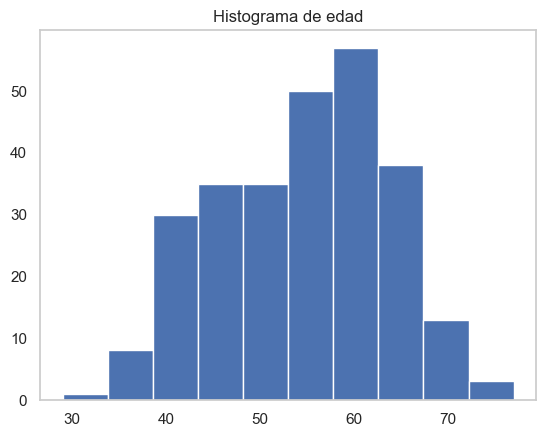

In [275]:
df[["age"]].hist(bins=10, grid=False)
plt.title("Histograma de edad")
plt.show()

Se puede notar que la edad de la muestra sigue una distribuci√≥n normal, con histograma en forma de campana de Gauss.

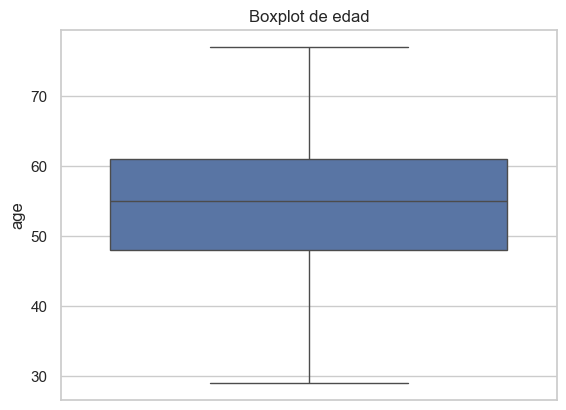

In [276]:
sns.boxplot(data = df["age"])
plt.title("Boxplot de edad")
plt.show()

In [277]:
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

outlier_info = outliers[["age"]].reset_index()
print(outlier_info)

Empty DataFrame
Columns: [index, age]
Index: []


La edad presenta una distribuci√≥n aproximadamente normal y no presenta valores outliers.

#### 2.2.2 Presi√≥n arterial en reposo

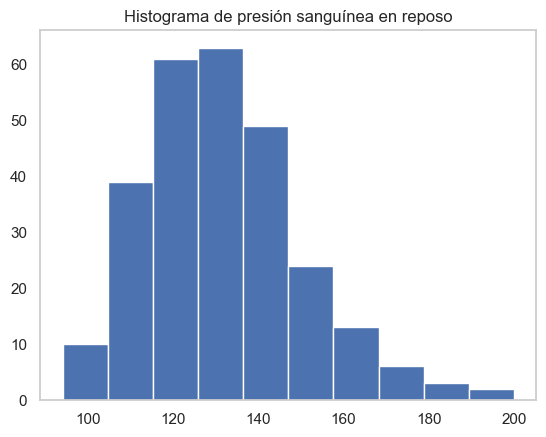

In [278]:
df[["rest-bp"]].hist(bins=10, grid=False)
plt.title("Histograma de presi√≥n sangu√≠nea en reposo")
plt.show()

Como primera observaci√≥n, podemos notar que la presi√≥n sangu√≠nea en reposo sigue una distribuci√≥n normal pero levemente sesgada hacia la derecha o positivamente.

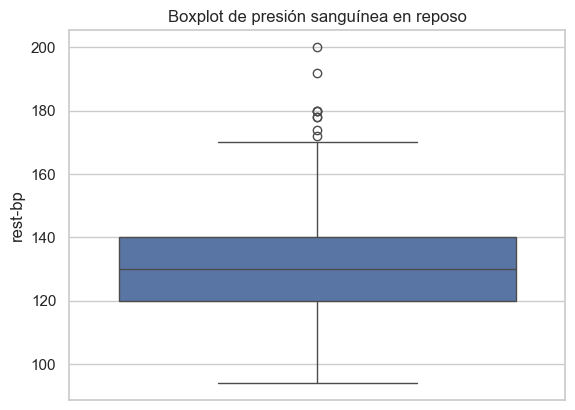

In [279]:
sns.boxplot(data = df["rest-bp"])
plt.title("Boxplot de presi√≥n sangu√≠nea en reposo")

plt.show()

In [280]:
q1 = df["rest-bp"].quantile(0.25)
q3 = df["rest-bp"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["rest-bp"] < lower_bound) | (df["rest-bp"] > upper_bound)]

outlier_info = outliers[["rest-bp"]].reset_index()
print(outlier_info)

   index  rest-bp
0     58    174.0
1     87    178.0
2    110    180.0
3    117    200.0
4    144    192.0
5    159    178.0
6    165    180.0
7    240    180.0
8    265    172.0


Gracias a la visualizaci√≥n del boxplot y la definici√≥n del rango intercuartil, podemos encontrar 9 valores outliers para la presi√≥n sangu√≠nea en reposo.

#### 2.2.3 Nivel de colesterol en sangre

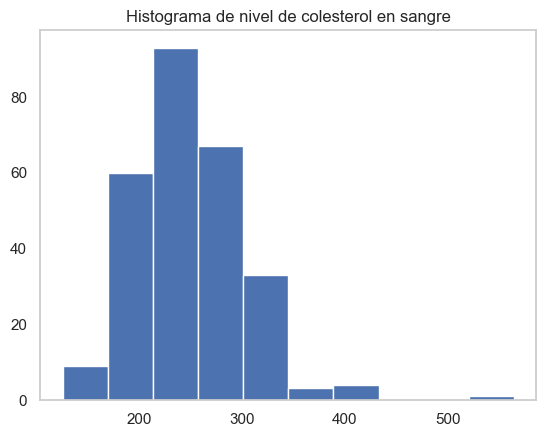

In [281]:
df[["serum-chol"]].hist(bins=10, grid=False)
plt.title("Histograma de nivel de colesterol en sangre")
plt.show()

Se puede notar una distribuci√≥n normal levemente sesgada a la derecha o positivamente.

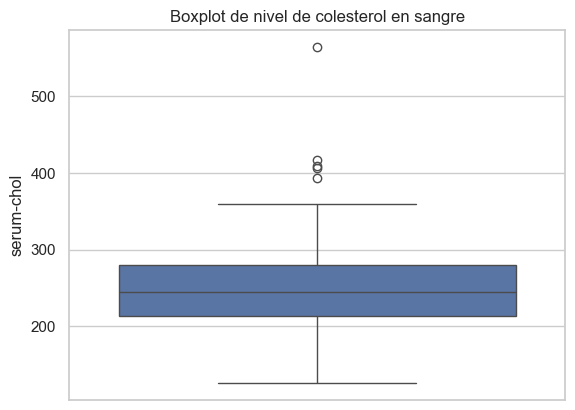

In [282]:
sns.boxplot(data = df["serum-chol"])
plt.title("Boxplot de nivel de colesterol en sangre")
plt.show()

In [283]:
q1 = df["serum-chol"].quantile(0.25)
q3 = df["serum-chol"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["serum-chol"] < lower_bound) | (df["serum-chol"] > upper_bound)]

outlier_info = outliers[["serum-chol"]].reset_index()
print(outlier_info)

   index  serum-chol
0      1       564.0
1      9       407.0
2     52       417.0
3    181       409.0
4    188       394.0


Se encuentran 5 valores outliers gracias al uso del gr√°fico boxplot y la definici√≥n del rango intercuart√≠lico.

#### 2.2.4 M√°ximo ritmo card√≠aco

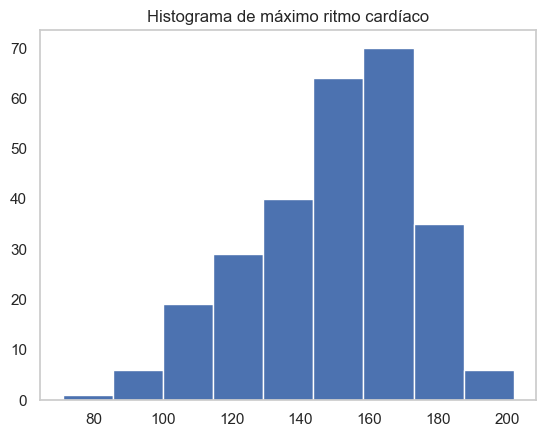

In [284]:
df[["max-heart-rate"]].hist(bins=9, grid=False)
plt.title("Histograma de m√°ximo ritmo card√≠aco")
plt.show()

Se puede observar una distribuci√≥n normal de datos para el m√°ximo ritmo card√≠aco con un leve sesgo hacia la izquierda o negativo.

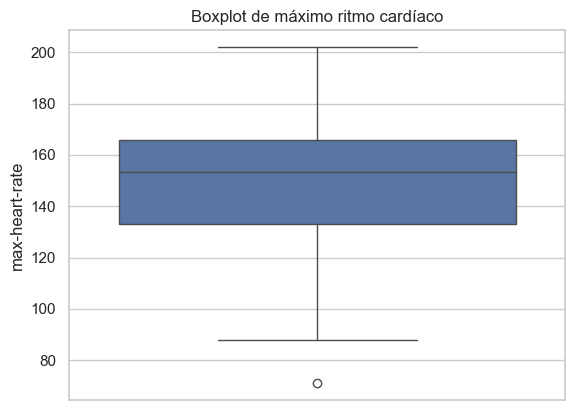

In [285]:
sns.boxplot(data = df["max-heart-rate"])
plt.title("Boxplot de m√°ximo ritmo card√≠aco")
plt.show()

In [286]:
q1 = df["max-heart-rate"].quantile(0.25)
q3 = df["max-heart-rate"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["max-heart-rate"] < lower_bound) | (df["max-heart-rate"] > upper_bound)]

outlier_info = outliers[["max-heart-rate"]].reset_index()
print(outlier_info)

   index  max-heart-rate
0    101            71.0


Se encuentra un √∫nico valor outlier para el m√°ximo ritmo card√≠aco.

#### 2.2.5 Depresi√≥n del intervalo ST del ECG

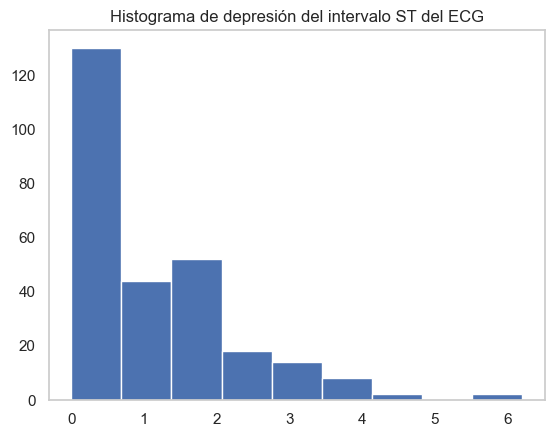

In [287]:
df[["oldpeak"]].hist(bins=9, grid=False)
plt.title("Histograma de depresi√≥n del intervalo ST del ECG")
plt.show()

Se puede observar una distribuci√≥n altamente sesgada a la derecha (tipo exponencial) de los datos para el caso de la depresi√≥n del segmento ST del electrocardiagrama.

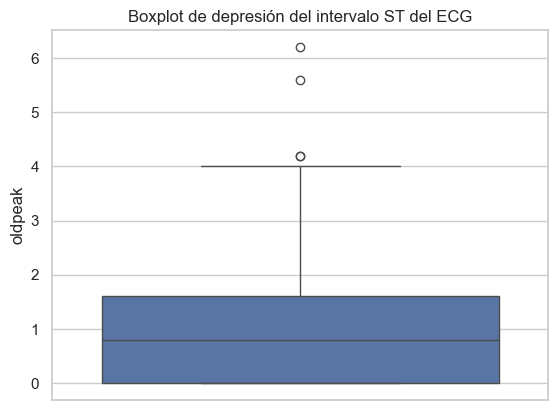

In [288]:
sns.boxplot(data = df["oldpeak"])

plt.title("Boxplot de depresi√≥n del intervalo ST del ECG")

plt.show()

In [289]:
q1 = df["oldpeak"].quantile(0.25)
q3 = df["oldpeak"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["oldpeak"] < lower_bound) | (df["oldpeak"] > upper_bound)]

outlier_info = outliers[["oldpeak"]].reset_index()
print(outlier_info)

   index  oldpeak
0     87      4.2
1    156      5.6
2    176      4.2
3    235      6.2


Se pudieron identificar 4 valores outliers para el caso de "oldpeak".

#### 2.2.6 Relaci√≥n entre variables num√©ricas

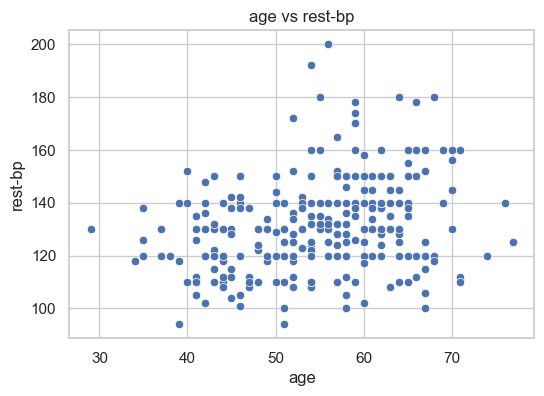

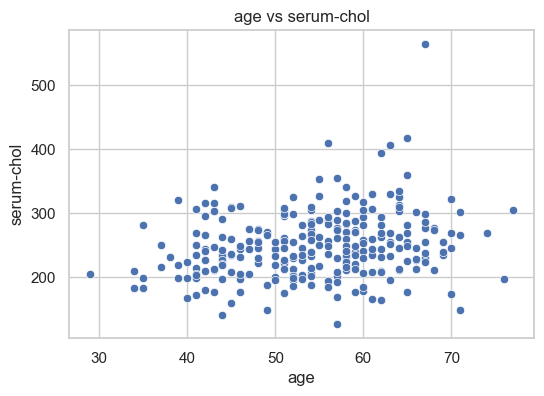

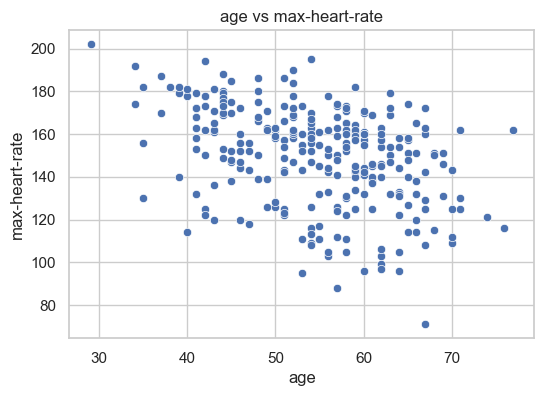

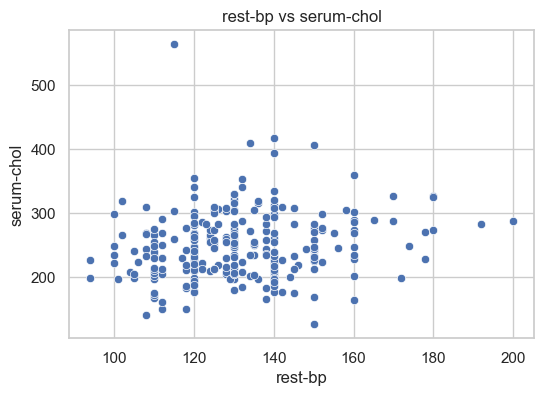

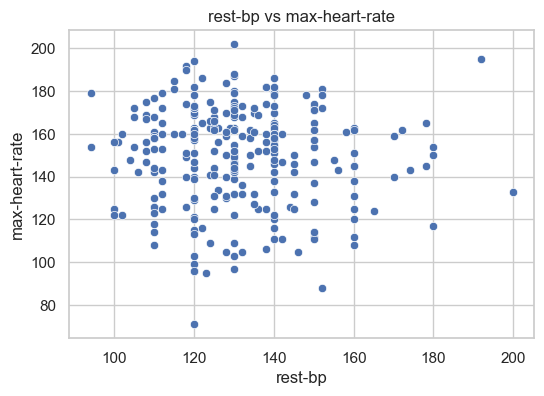

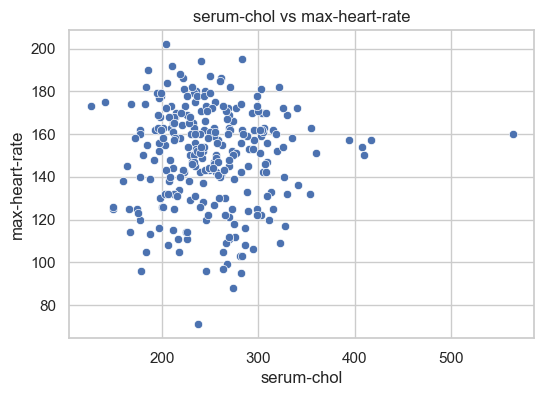

In [290]:
variables = ['age', 'rest-bp', 'serum-chol', 'max-heart-rate']

# Crear scatter plots entre cada par de variables
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=variables[i], y=variables[j], data=df)
        plt.title(f'{variables[i]} vs {variables[j]}')
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.show()

Los gr√°ficos de dispersi√≥n no muestran relaciones lineales fuertes entre las variables num√©ricas, lo que sugiere que su influencia sobre la variable objetivo puede ser m√°s compleja o depender de variables no incluidas en este conjunto. No obstante, confirmaron visualmente algunos valores at√≠picos previamente detectadosm como niveles de colesterol s√©rico y presi√≥n arterial.

La dispersi√≥n amplia observada refuerza la idea de que estas variables no tienen una dependencia directa significativa, lo que indica la necesidad de an√°lisis m√°s avanzados para comprender mejor su impacto en la variable objetivo.


### 2.3 Exploraci√≥n estad√≠stica de variables categ√≥ricas


En esta secci√≥n se analizan las variables categ√≥ricas presentes en el conjunto de datos. Se realiza una descripci√≥n de su distribuci√≥n y se discute su posible relaci√≥n con la variable objetivo (heart_disease).

#### 2.3.1 Sexo

In [291]:
df['sex'].unique()

array([1., 0.])

In [292]:
df["sex"] = df["sex"].map({0.: 'Mujer', 1.: 'Hombre'})
df["sex"].value_counts()

sex
Hombre    183
Mujer      87
Name: count, dtype: int64

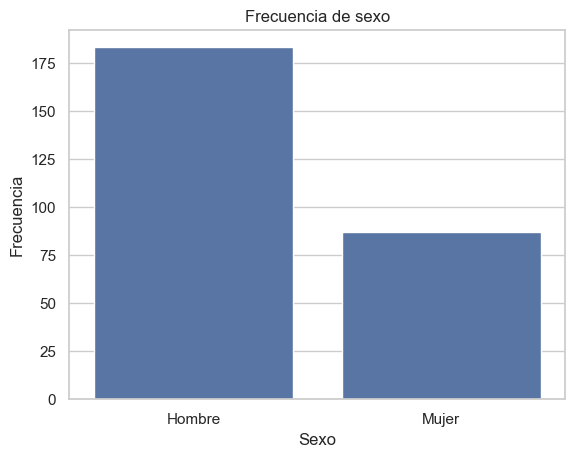

In [293]:
sns.countplot(x='sex', data=df)
plt.title(f'Frecuencia de sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

La muestra est√° compuesta por 183 hombres (67.7%) y 87 mujeres (32.3%), mostrando un predominio de sexo masculino.

In [294]:
df['sex'].unique()

array(['Hombre', 'Mujer'], dtype=object)

In [295]:
# Revertir 'sex'
df['sex'] = df['sex'].map({'Hombre': 1., 'Mujer': 0.})
df['sex'].unique()

array([1., 0.])

In [296]:
df['sex'].value_counts()

sex
1.0    183
0.0     87
Name: count, dtype: int64

#### 2.3.2 Tipo de dolor de pecho

In [297]:
df["chest-pain"].unique()

array([4., 3., 2., 1.])

In [298]:
df['chest-pain'] = df['chest-pain'].map({
    1.: 'Angina t√≠pica',
    2.: 'Angina at√≠pica',
    3.: 'No angina',
    4.: 'Asintom√°tico'
})

df["chest-pain"].value_counts()

chest-pain
Asintom√°tico      129
No angina          79
Angina at√≠pica     42
Angina t√≠pica      20
Name: count, dtype: int64

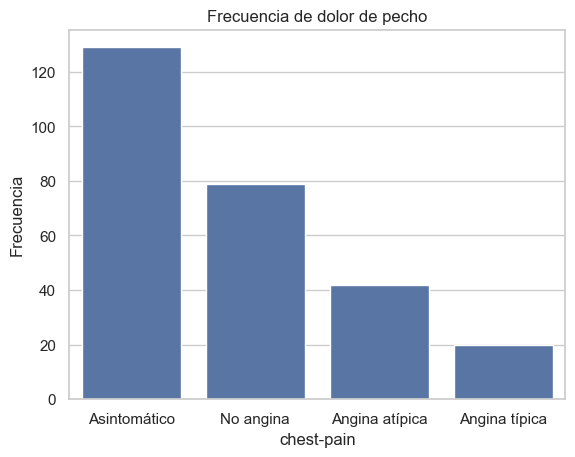

In [299]:
sns.countplot(x='chest-pain', data=df, order=df['chest-pain'].value_counts().index)
plt.title(f'Frecuencia de dolor de pecho')
plt.xlabel('chest-pain')
plt.ylabel('Frecuencia')
plt.show()

Se puede observar que en la muestra, 129 personas son asintom√°ticas, 79 presentan dolor no correspondiente a angina, 42 presentan un dolor tipo angina at√≠pica y 20 un dolor tipo angina t√≠pica.

In [300]:
# Revertir 'chest-pain'
df['chest-pain'] = df['chest-pain'].replace({
    'angina t√≠pica': 1.,
    'angina at√≠pica': 2.,
    'dolor no angina': 3.,
    'asintom√°tico': 4.
})

#### 2.3.3 Nivel de az√∫car en sangre en ayuno

In [301]:
df["fasting-blood-sugar"].value_counts()

fasting-blood-sugar
0.0    230
1.0     40
Name: count, dtype: int64

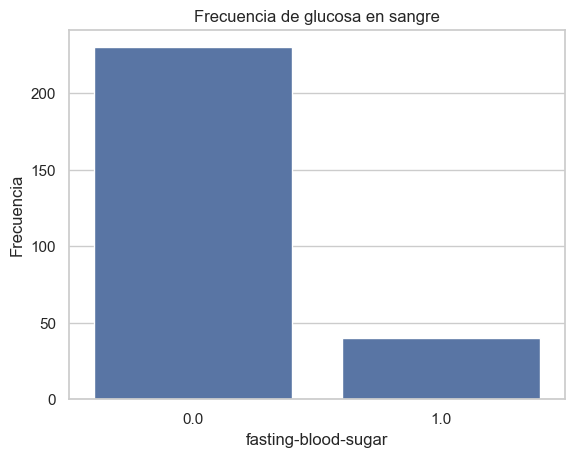

In [302]:
sns.countplot(x='fasting-blood-sugar', data=df)
plt.title(f'Frecuencia de glucosa en sangre')
plt.xlabel('fasting-blood-sugar')
plt.ylabel('Frecuencia')
plt.show()

Se puede observar que de la muestra, 230 personas (85.2%) presentan un nivel de az√∫car en sangre menor a 120 mg/dl y solo 40 personas (14.8%) un nivel mayor a esa medida.

In [303]:
df['fasting-blood-sugar'].unique()

array([0., 1.])

#### 2.3.4 Resultado del electrocardiograma

In [304]:
df['ecg'].unique()

array([2., 0., 1.])

In [305]:
df['ecg'] = df['ecg'].map({
    0.: 'Normal',
    1.: 'Anormalidad ST-T',
    2.: 'Hipertrofia ventricular'
})

df["ecg"].value_counts()

ecg
Hipertrofia ventricular    137
Normal                     131
Anormalidad ST-T             2
Name: count, dtype: int64

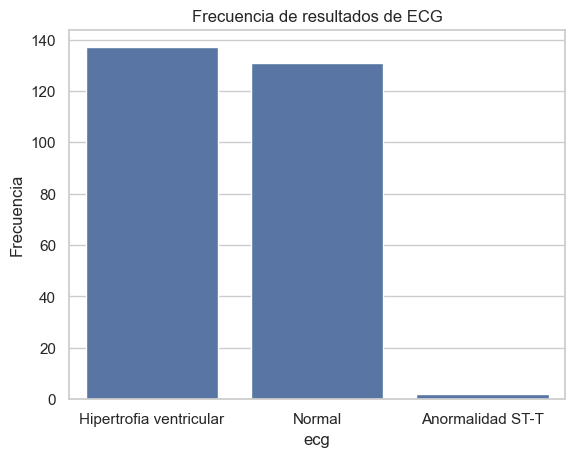

In [306]:
sns.countplot(x='ecg', data=df)
plt.title(f'Frecuencia de resultados de ECG')
plt.xlabel('ecg')
plt.ylabel('Frecuencia')
plt.show()

En la muestra, 131 personas presentan un electrocardiograma normal en reposo, 137 personas presentan una hipertrofia del ventr√≠culo derecho seg√∫n el criterio de Estes y solo 2 personas presentan un per√≠odo de onda T anormal.

In [307]:
df['ecg'].unique()

array(['Hipertrofia ventricular', 'Normal', 'Anormalidad ST-T'],
      dtype=object)

In [308]:
# Revertir 'ecg'
df['ecg'] = df['ecg'].replace({
    'Normal': 0.,
    'Anormalidad ST-T': 1.,
    'Hipertrofia ventricular': 2.
})

In [309]:
df['ecg'].unique()

array([2., 0., 1.])

In [310]:
df['ecg'].value_counts()

ecg
2.0    137
0.0    131
1.0      2
Name: count, dtype: int64

#### 2.3.5 Presencia de angina durante el ejercicio

In [311]:
df["angina"].value_counts()

angina
0.0    181
1.0     89
Name: count, dtype: int64

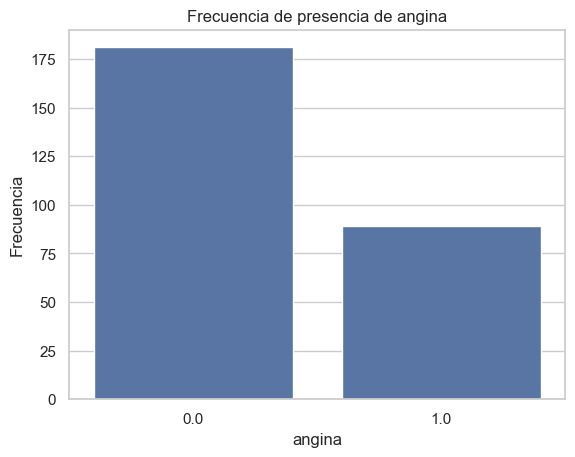

In [312]:
sns.countplot(x='angina', data=df)
plt.title(f'Frecuencia de presencia de angina')
plt.xlabel('angina')
plt.ylabel('Frecuencia')
plt.show()

Se observa que el 67.0% de las personas no presenta angina durante el ejercicio, mientras que el 33.0% s√≠ la experimenta.

#### 2.3.6 Pendiente del intervalo ST del ECG

In [313]:
df["slope"].unique()

array([2., 1., 3.])

In [314]:
df['slope'] = df['slope'].map({
    1.: 'Ascendente',
    2.: 'Plana',
    3.: 'Descendente'
})

df["slope"].value_counts()

slope
Ascendente     130
Plana          122
Descendente     18
Name: count, dtype: int64

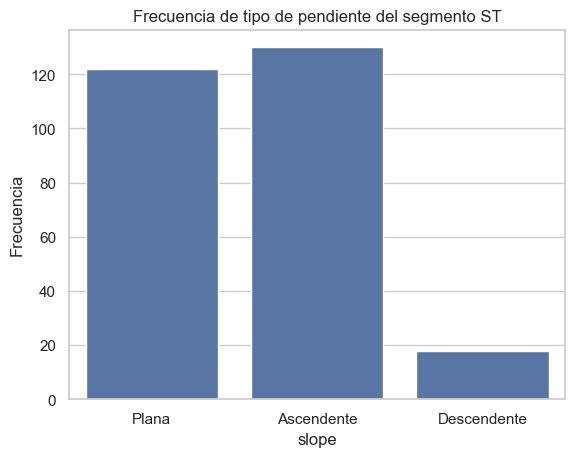

In [315]:
sns.countplot(x='slope', data=df)
plt.title(f'Frecuencia de tipo de pendiente del segmento ST')
plt.xlabel('slope')
plt.ylabel('Frecuencia')
plt.show()

Se puede observar que 130 personas presentan una pendiente del segmento ST del electrocardiograma ascendente, 122 una pendiente plana y 18 personas una pendiente descendente.

In [316]:
df['slope'].unique()

array(['Plana', 'Ascendente', 'Descendente'], dtype=object)

In [317]:
# Revertir 'slope'
df['slope'] = df['slope'].replace({
    'Ascendente': 1.,
    'Plana': 2.,
    'Descendente': 3.
})

In [318]:
df['slope'].unique()

array([2., 1., 3.])

In [319]:
df['slope'].value_counts()

slope
1.0    130
2.0    122
3.0     18
Name: count, dtype: int64

#### 2.3.7 N√∫mero de arterias principales

In [320]:
df["major-vessels"].value_counts()

major-vessels
0.0    160
1.0     58
2.0     33
3.0     19
Name: count, dtype: int64

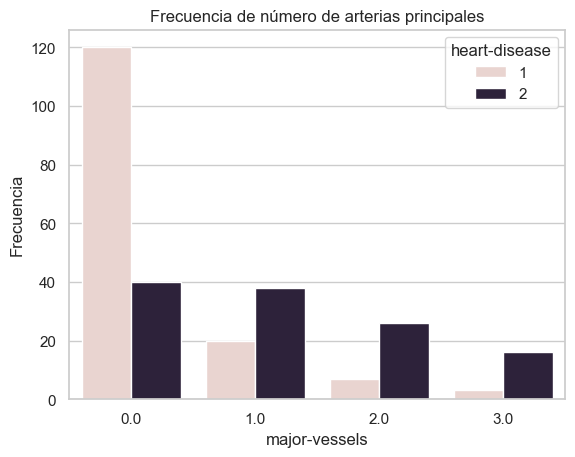

In [321]:
sns.countplot(x='major-vessels', data=df, hue='heart-disease')
plt.title(f'Frecuencia de n√∫mero de arterias principales')
plt.xlabel('major-vessels')
plt.ylabel('Frecuencia')
plt.show()

De los datos, se sabe que 160 personas no presentan vasos principales coloreados por fluroscopia, 58 un vaso, 33 dos vasos y 19 tres vasos sangu√≠neos.

La variable major-vessels, que indica el n√∫mero de vasos sangu√≠neos principales coloreados por fluoroscopia (valores posibles: 0, 1, 2 o 3), muestra una distribuci√≥n marcadamente diferente seg√∫n la presencia o no de enfermedad card√≠aca.

Al analizar su frecuencia para cada clase de la variable objetivo heart-disease, se observa que:

- La mayor√≠a de los pacientes sin enfermedad card√≠aca (clase 1) tienen 0 arterias coloreadas.

- En cambio, los pacientes con enfermedad card√≠aca (clase 2) tienden a tener un mayor n√∫mero de vasos coloreados (1, 2 o incluso 3).

- Existe una tendencia creciente en la frecuencia de enfermedad a medida que aumenta el n√∫mero de vasos detectados, lo cual sugiere una correlaci√≥n positiva entre major-vessels y la presencia de enfermedad card√≠aca.

Esta variable podr√≠a tener un alto poder predictivo al ser incluida en un modelo de clasificaci√≥n, ya que presenta un comportamiento distintivo entre las clases. Su an√°lisis refuerza la idea de que la obstrucci√≥n o alteraci√≥n en m√∫ltiples vasos coronarios puede estar asociada a una mayor probabilidad de padecer enfermedad card√≠aca.

#### 2.3.8 Presencia de defecto card√≠aco

In [322]:
df['thal'] = df['thal'].map({
    3: 'Normal',
    6: 'Defecto fijo',
    7: 'Defecto reversible'
})

df["thal"].value_counts()

thal
Normal                152
Defecto reversible    104
Defecto fijo           14
Name: count, dtype: int64

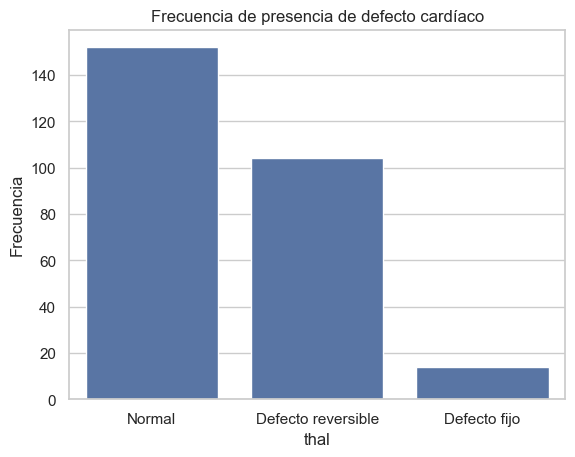

In [323]:
sns.countplot(x='thal', data=df)
plt.title(f'Frecuencia de presencia de defecto card√≠aco')
plt.xlabel('thal')
plt.ylabel('Frecuencia')
plt.show()

152 personas no presentan ningun defecto, 14 personas presentan un defecto fijo y 104 personas un defecto reversible.

In [324]:
df['thal'].unique()

array(['Normal', 'Defecto reversible', 'Defecto fijo'], dtype=object)

In [325]:
# Revertir 'thal'
df['thal'] = df['thal'].replace({
    'Normal': 3.,
    'Defecto fijo': 6.,
    'Defecto reversible': 7.
})

In [326]:
df['thal'].unique()

array([3., 7., 6.])

In [327]:
df['thal'].value_counts()

thal
3.0    152
7.0    104
6.0     14
Name: count, dtype: int64

#### 2.3.9 Matriz de correlaci√≥n

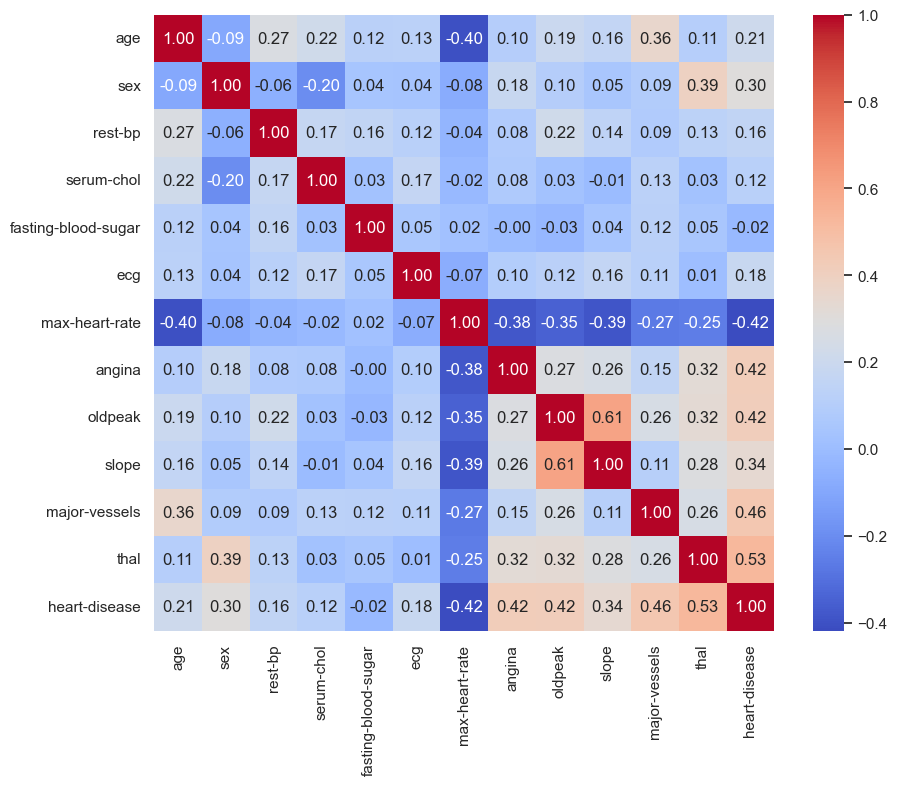

In [328]:
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Se observa una correlaci√≥n negativa moderada entre la frecuencia card√≠aca m√°xima y la presencia de enfermedad card√≠aca (r = -0.42), y correlaciones positivas con variables como tipo de dolor de pecho, presencia de angina, pendiente ST, n√∫mero de vasos principales y defecto card√≠aco, todas mayores a 0.4.

In [329]:
df["heart-disease"].value_counts()

heart-disease
1    150
2    120
Name: count, dtype: int64

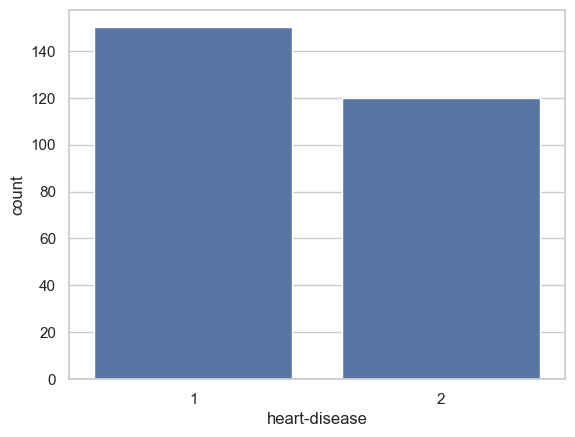

In [330]:
sns.countplot(x='heart-disease', data=df)
plt.show()

150 personas no padecen de una enfermedad card√≠aca y 120 si padecen.

## 3. Limpieza de Datos

### 3.1 Verificaci√≥n valores nulos

In [331]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

age                    0
sex                    0
chest-pain             0
rest-bp                0
serum-chol             0
fasting-blood-sugar    0
ecg                    0
max-heart-rate         0
angina                 0
oldpeak                0
slope                  0
major-vessels          0
thal                   0
heart-disease          0
dtype: int64

No se presentan valores nulos en ninguna columna del conjunto de datos, por lo que no es necesario aplicar imputaci√≥n ni eliminaci√≥n de filas/columnas.

### 3.2 Verificaci√≥n duplicados

In [332]:
# Verificar duplicados
df.duplicated().sum()

np.int64(0)

No se detectan registros duplicados, por lo tanto no se requiere ninguna acci√≥n adicional en este paso.

### 3.3 An√°lisis de valores outliers en variables num√©ricas

Durante la etapa exploratoria se analizaron los valores at√≠picos mediante diagramas de caja (boxplots) y m√©todos basados en el rango intercuart√≠lico (IQR). A continuaci√≥n, se detalla el tratamiento adoptado para cada variable num√©rica:

**Edad** (age)
No se identificaron valores at√≠picos. Los valores se encuentran dentro del rango cl√≠nicamente esperable.

‚Üí No se realiza ninguna acci√≥n.


**Presi√≥n arterial en reposo** (rest-bp) Se encontraron 9 valores por fuera del rango. Decid√≠ mantener los valores extremos en el dataset, ya que representan casos cl√≠nicamente posibles. Aunque estos valores son altos y se identificaron como outliers, pueden ser indicadores relevantes para el modelo, especialmente porque la hipertensi√≥n severa es un factor de riesgo significativo en la aparici√≥n de enfermedades card√≠acas. Eliminarlos podr√≠a llevar a una p√©rdida de informaci√≥n importante que podr√≠a afectar la capacidad del modelo para identificar patrones relacionados con la enfermedad card√≠aca en pacientes con valores extremos. Por lo tanto, opt√© por incluirlos inicialmente para evaluar c√≥mo contribuyen al rendimiento del modelo de clasificaci√≥n. Sin embargo, si en etapas posteriores del desarrollo del modelo se observa que estos valores afectan negativamente su rendimiento o introducen ruido que compromete la fiabilidad de las predicciones, considerar√© estrategias para manejarlos. Esto podr√≠a incluir su eliminaci√≥n o intercambio con valores m√°s representativos del rango observado.

‚Üí No se realiza ninguna acci√≥n.


**Colesterol en sangre** (serum-chol) Los valores extremos listados aqu√≠, aunque elevados, representan valores posibles en pacientes con hipercolesterolemia severa. En el contexto de la predicci√≥n de enfermedades card√≠acas, estos valores pueden ser particularmente relevantes, ya que el colesterol elevado es un factor de riesgo para problemas cardiovasculares. Por lo tanto, inicialmente optar√≠a por mantener estos valores en el dataset para no perder informaci√≥n valiosa que pueda mejorar la capacidad del modelo de identificar patrones asociados a la enfermedad. Sin embargo, igual que en el caso de la presi√≥n arterial, monitorear√≠a su impacto en el rendimiento del modelo. Si se detecta que estos valores extremos introducen ruido o dificultan el aprendizaje del modelo, considerar√≠a aplicar t√©cnicas como normalizaci√≥n, o incluso eliminarlos si es necesario.

‚Üí No se realiza ninguna acci√≥n.


**Frecuencia card√≠aca m√°xima** (max-heart-rate) El valor outlier de 71 lat/min claramente no se ajusta a lo esperado en este tipo de an√°lisis, ya que est√° muy por debajo del rango t√≠pico observado en pruebas de esfuerzo o actividad f√≠sica, donde los valores suelen superar ampliamente los 100 lat/min. Este dato podr√≠a ser un error de registro o representar un caso muy aislado que no aporta informaci√≥n √∫til al modelo. Adem√°s, mantenerlo podr√≠a sesgar el an√°lisis y afectar las predicciones, ya que el modelo podr√≠a interpretarlo como un caso representativo cuando no lo es.
Por este motivo, decid√≠ eliminarlo del dataset.

‚Üí Se decide eliminar este valor para evitar sesgos en el modelo.

In [333]:
Q1 = df["max-heart-rate"].quantile(0.25)
Q3 = df["max-heart-rate"].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['max-heart-rate'] < (Q1 - 1.5 * IQR)) | (df['max-heart-rate'] > (Q3 + 1.5 * IQR)))]

In [334]:
q1 = df["max-heart-rate"].quantile(0.25)
q3 = df["max-heart-rate"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["max-heart-rate"] < lower_bound) | (df["max-heart-rate"] > upper_bound)]

outlier_info = outliers[["max-heart-rate"]].reset_index()
print(outlier_info)

Empty DataFrame
Columns: [index, max-heart-rate]
Index: []


Verificaci√≥n de la eliminaci√≥n del valor at√≠pico.

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 0 to 269
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  269 non-null    float64
 1   sex                  269 non-null    float64
 2   chest-pain           269 non-null    object 
 3   rest-bp              269 non-null    float64
 4   serum-chol           269 non-null    float64
 5   fasting-blood-sugar  269 non-null    float64
 6   ecg                  269 non-null    float64
 7   max-heart-rate       269 non-null    float64
 8   angina               269 non-null    float64
 9   oldpeak              269 non-null    float64
 10  slope                269 non-null    float64
 11  major-vessels        269 non-null    float64
 12  thal                 269 non-null    float64
 13  heart-disease        269 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 31.5+ KB


Se chequea que el valor outlier ha sido eliminado correctamente.

**Depresi√≥n del segmento ST** (oldpeak) Se decide explorar primero si estos valores se relacionan directamente con que la persona padezca una enfermedad card√≠aca.

In [336]:
q1 = df["oldpeak"].quantile(0.25)
q3 = df["oldpeak"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df["oldpeak"] < lower_bound) | (df["oldpeak"] > upper_bound)]

outliers_heart_disease = outliers[['oldpeak', 'heart-disease']]

print(outliers_heart_disease)

     oldpeak  heart-disease
87       4.2              1
156      5.6              2
176      4.2              2
235      6.2              2


En el caso de los valores at√≠picos en la variable oldpeak, se observa que algunos de estos valores est√°n asociados con la presencia de enfermedad card√≠aca (heart_disease = 2), como el caso del valor 5.6, lo que sugiere que estos valores podr√≠an ser representaciones de situaciones cl√≠nicas reales. La depresi√≥n del segmento ST, es una caracter√≠stica importante en el diagn√≥stico de la enfermedad card√≠aca, por lo que estos valores elevados pueden aportar informaci√≥n relevante para la predicci√≥n de la enfermedad. Dado que los outliers en oldpeak est√°n vinculados a la presencia de la enfermedad, no se eliminan de inmediato, ya que su eliminaci√≥n podr√≠a llevar a la p√©rdida de datos valiosos. Se mantendr√°n en el modelo, pero se continuar√° monitoreando el impacto que puedan tener en el rendimiento del modelo.

‚Üí Se opta por conservar estos valores y monitorear su impacto en el modelo.

### 3.4 Conversi√≥n de columnas a num√©ricas o categ√≥ricas

Para asegurar un correcto procesamiento posterior, se ajustan los tipos de datos. Las variables continuas se convierten a num√©ricas, y las variables discretas o categ√≥ricas se transforman a tipo category.

In [337]:
# Conversi√≥n a num√©ricas
df['age'] = pd.to_numeric(df['age'])
df['rest-bp'] = pd.to_numeric(df['rest-bp'])
df['serum-chol'] = pd.to_numeric(df['serum-chol'])
df['max-heart-rate'] = pd.to_numeric(df['max-heart-rate'])
df['oldpeak'] = pd.to_numeric(df['oldpeak'])

In [338]:
# Conversi√≥n a categ√≥ricas
categorical_cols = ['sex', 'chest-pain', 'fasting-blood-sugar', 'ecg',
                    'angina', 'slope', 'major-vessels', 'thal', 'heart-disease']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 0 to 269
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  269 non-null    float64 
 1   sex                  269 non-null    category
 2   chest-pain           269 non-null    category
 3   rest-bp              269 non-null    float64 
 4   serum-chol           269 non-null    float64 
 5   fasting-blood-sugar  269 non-null    category
 6   ecg                  269 non-null    category
 7   max-heart-rate       269 non-null    float64 
 8   angina               269 non-null    category
 9   oldpeak              269 non-null    float64 
 10  slope                269 non-null    category
 11  major-vessels        269 non-null    category
 12  thal                 269 non-null    category
 13  heart-disease        269 non-null    category
dtypes: category(9), float64(5)
memory usage: 16.2 KB


In [340]:
df.head()

age  sex      chest-pain  rest-bp  serum-chol fasting-blood-sugar  ecg  \
0  70.0  1.0    Asintom√°tico    130.0       322.0                 0.0  2.0   
1  67.0  0.0       No angina    115.0       564.0                 0.0  2.0   
2  57.0  1.0  Angina at√≠pica    124.0       261.0                 0.0  0.0   
3  64.0  1.0    Asintom√°tico    128.0       263.0                 0.0  0.0   
4  74.0  0.0  Angina at√≠pica    120.0       269.0                 0.0  2.0   

   max-heart-rate angina  oldpeak slope major-vessels thal heart-disease  
0           109.0    0.0      2.4   2.0           3.0  3.0             2  
1           160.0    0.0      1.6   2.0           0.0  7.0             1  
2           141.0    0.0      0.3   1.0           0.0  7.0             2  
3           105.0    1.0      0.2   2.0           1.0  7.0             1  
4           121.0    1.0      0.2   1.0           1.0  3.0             1

## 4. Resumen de Hallazgos Iniciales

Despu√©s de realizar un an√°lisis exploratorio y estad√≠stico del dataset, se han identificado hallazgos relevantes que permiten comenzar a comprender la estructura de los datos y el comportamiento de las variables respecto a la presencia de enfermedad card√≠aca.

### 4.1 Calidad del dataset

- El conjunto de datos original conten√≠a 270 registros. Se eliminaron los registros con outliers extremos que pudieran ser errores o afectar negativamente al modelo (por ejemplo, un valor an√≥malo de max-heart-rate).

- No se encontraron valores nulos ni duplicados.

- Se verific√≥ que las variables categ√≥ricas y num√©ricas est√©n correctamente tipificadas para su posterior uso en el modelado.

### 4.2 Variables num√©ricas

- **rest-bp** y **serum-chol** presentaron outliers, pero se decidi√≥ mantenerlos dado que representan posibles condiciones cl√≠nicas (hipertensi√≥n o hipercolesterolemia).

- **oldpeak** mostr√≥ valores altos relacionados con la presencia de enfermedad card√≠aca (heart-disease = 2). Dado que refleja depresi√≥n del segmento ST, un indicador cl√≠nico importante, se mantendr√°n estos valores por su potencial valor predictivo.

- En **max-heart-rate**, se detect√≥ un valor muy bajo (71 lat/min), que no era consistente con los valores esperados en pruebas de esfuerzo. Se opt√≥ por eliminarlo al considerarlo un caso aislado o potencial error de registro.

### 4.3 Variables categ√≥ricas

Se observaron distribuciones desbalanceadas en algunas variables, por ejemplo:

- Mayor proporci√≥n de hombres que mujeres.

- Alta frecuencia de casos asintom√°ticos en la variable chest-pain.

- Poca presencia de algunos valores en thal, major-vessels y ecg.

Estos desbalances podr√≠an influir en el rendimiento de los modelos predictivos, por lo que se tendr√°n en cuenta durante el preprocesamiento y el entrenamiento.

### 4.4 Correlaciones

- La matriz de correlaci√≥n no mostr√≥ asociaciones lineales fuertes entre las variables num√©ricas y la variable objetivo **heart-disease**.

- Esto sugiere que la relaci√≥n entre las variables independientes y la presencia de enfermedad card√≠aca podr√≠a no ser lineal, o depender de interacciones entre m√∫ltiples variables.

- Por esta raz√≥n, se decidi√≥ conservar todas las variables, incluso aquellas con baja correlaci√≥n individual, para permitir que modelos m√°s complejos (como √°rboles o ensambles) puedan captar relaciones no lineales.

### 4.5 Consideraciones para el modelado

- Se opt√≥ por mantener los outliers cl√≠nicamente posibles para no perder informaci√≥n relevante, monitoreando su impacto durante la evaluaci√≥n de modelos.

- La variable objetivo (heart-disease) est√° levemente desbalanceada, por lo que ser√° importante evaluar m√©tricas como recall y f1-score, adem√°s del accuracy, al momento de modelar.

- Todas las variables fueron convertidas correctamente a su tipo de dato correspondiente (float o category), lo que facilitar√° su transformaci√≥n posterior (e.g. codificaci√≥n, escalado).

## 5. Definici√≥n del problema y justificaci√≥n del modelo de Machine Learning elegido

El objetivo principal de este proyecto es desarrollar un modelo de *Machine Learning* capaz de predecir la **presencia de enfermedad card√≠aca** en pacientes, utilizando informaci√≥n m√©dica y fisiol√≥gica. Esta tarea se enmarca dentro del aprendizaje supervisado, espec√≠ficamente como un problema de clasificaci√≥n binaria, ya que la variable objetivo (*heart-disease*) indica si un paciente presenta (2) o no presenta (1) enfermedad card√≠aca.

La posibilidad de predecir el riesgo de enfermedad card√≠aca de forma automatizada es de gran relevancia para la medicina preventiva. Detectar de manera temprana a pacientes con alto riesgo podr√≠a permitir a los profesionales de la salud tomar decisiones m√°s informadas, asignar recursos de manera eficiente y aplicar intervenciones cl√≠nicas oportunas.

El dataset utilizado contiene diversas variables cl√≠nicas y fisiol√≥gicas de cada paciente, tales como:

- Edad (age)

- Sexo (sex)

- Tipo de dolor de pecho (chest-pain)

- Presi√≥n arterial en reposo (rest-bp)

- Colesterol s√©rico (serum-chol)

- Frecuencia card√≠aca m√°xima alcanzada (max-heart-rate)

- Resultados del electrocardiograma en reposo (ecg)

- Depresi√≥n del segmento ST (oldpeak)

- Presencia de angina inducida por ejercicio (angina)

- N√∫mero de vasos principales observados en fluoroscopia (major-vessels)

- Tipo de defecto detectado por talio (thal)

- Frecuencia card√≠aca m√°xima alcanzada (max-heart-rate)

- Resultados del electrocardiograma en reposo (ecg)

- Depresi√≥n del segmento ST (oldpeak)

- Presencia de angina inducida por ejercicio (angina)

- N√∫mero de vasos principales observados en fluoroscopia (major-vessels)

- Tipo de defecto detectado por talio (thal)

**Modelo elegido**: **Random Forest**

Para abordar esta tarea se ha seleccionado el algoritmo Random Forest como modelo base. Esta elecci√≥n se justifica por las siguientes razones:

üîπ **Manejo de distintos tipos de variables**: Random Forest permite trabajar directamente con variables num√©ricas y categ√≥ricas, minimizando la necesidad de transformaciones complejas.

üîπ **Robustez ante outliers y ruido**: A diferencia de modelos m√°s sensibles como el KNN o regresi√≥n log√≠stica, Random Forest tolera bien la presencia de valores extremos, lo cual es importante dado que en este dataset se conservaron ciertos outliers cl√≠nicamente relevantes.

üîπ **Reducci√≥n de overfitting**: Al combinar m√∫ltiples √°rboles de decisi√≥n entrenados sobre subconjuntos aleatorios de los datos y las variables, Random Forest mejora la generalizaci√≥n del modelo.

üîπ **Interpretabilidad**: Permite obtener medidas de importancia de las variables, lo que es muy √∫til en contextos cl√≠nicos para entender qu√© factores contribuyen m√°s a la predicci√≥n.

üîπ **Buen desempe√±o base**: Sin necesidad de un ajuste excesivo de hiperpar√°metros, suele ofrecer buenos resultados iniciales, lo cual permite enfocarse en la interpretaci√≥n y evaluaci√≥n cl√≠nica del modelo.

Dado este contexto, Random Forest representa una opci√≥n s√≥lida y balanceada entre precisi√≥n, robustez e interpretabilidad. No obstante, se evaluar√° su rendimiento comparativamente con otros algoritmos en etapas posteriores, con el objetivo de optimizar el modelo final.

## 6. Selecci√≥n de caracter√≠sticas

Para entrenar el modelo de clasificaci√≥n del dataset de enfermedades card√≠acas, se han seleccionado variables que presentan relevancia cl√≠nica comprobada y un potencial predictivo significativo para la presencia o ausencia de enfermedad card√≠aca. A continuaci√≥n, se detallan las variables elegidas junto con su justificaci√≥n:

- Edad (**age**): Es un factor de riesgo ampliamente reconocido. Con el envejecimiento, aumentan la probabilidad de hipertensi√≥n, acumulaci√≥n de colesterol y cambios estructurales en el sistema cardiovascular.

- Sexo (**sex**): El riesgo de enfermedad card√≠aca var√≠a seg√∫n el g√©nero. En general, los hombres tienen mayor riesgo a edades m√°s tempranas, mientras que en mujeres el riesgo aumenta luego de la menopausia.

- Dolor en el pecho (**chest-pain**): Es uno de los s√≠ntomas cl√≠nicos m√°s indicativos. La presencia de angina t√≠pica o at√≠pica puede se√±alar obstrucciones coronarias o isquemia, siendo un criterio diagn√≥stico frecuente.

- Presi√≥n arterial en reposo (**rest_bp**): La hipertensi√≥n es un factor de riesgo clave en la fisiopatolog√≠a cardiovascular. Su inclusi√≥n permite capturar esta condici√≥n cl√≠nica de base.

- Colesterol en sangre (**serum-chol**): Niveles elevados de colesterol LDL contribuyen a la aterosclerosis y, en consecuencia, al riesgo de infarto. Es un par√°metro fundamental en el an√°lisis de riesgo cardiovascular.

- M√°ximo frecuencia card√≠aca (**max-heart-rate**): Mide la capacidad funcional del coraz√≥n durante el esfuerzo. Valores muy bajos pueden indicar una respuesta card√≠aca deficiente, asociada a cardiopat√≠as.

- Angina inducida por ejercicio (**angina**): Refleja una respuesta cl√≠nica adversa al estr√©s f√≠sico. Es un signo importante de posible obstrucci√≥n coronaria.

- Depresi√≥n del segmento ST (**oldpeak**): Cambios en el segmento ST durante el ejercicio suelen asociarse a isquemia mioc√°rdica, una manifestaci√≥n directa de compromiso coronario.

- N√∫mero de vasos principales coloreados (major_vessels): Mide la cantidad de vasos visibles mediante fluoroscopia. Su reducci√≥n puede estar asociada a obstrucciones significativas.

- Defecto detectado en la prueba de talio (**thal**): La presencia de un defecto fijo o reversible es indicativa de alteraciones funcionales o estructurales en el m√∫sculo card√≠aco.

Estas variables representan un conjunto robusto y cl√≠nicamente informado, que permite al modelo de Machine Learning captar m√∫ltiples dimensiones del riesgo cardiovascular: demogr√°ficas, fisiol√≥gicas, sintom√°ticas y de diagn√≥stico por im√°genes.

La diversidad de tipos de datos (categ√≥ricos y num√©ricos) en estas variables tambi√©n permite que el modelo aprenda relaciones complejas y no lineales, lo cual resulta especialmente √∫til en un contexto m√©dico donde m√∫ltiples factores pueden interactuar entre s√≠. Esta combinaci√≥n proporciona una base s√≥lida para construir un modelo predictivo confiable y cl√≠nicamente relevante.








## 7. Implementaci√≥n y entrenamiento del modelo

### 7.1 Preparaci√≥n del entorno

Se importan las librer√≠as necesarias y se verifica el estado del dataset preprocesado.

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [342]:
df.head()

age  sex      chest-pain  rest-bp  serum-chol fasting-blood-sugar  ecg  \
0  70.0  1.0    Asintom√°tico    130.0       322.0                 0.0  2.0   
1  67.0  0.0       No angina    115.0       564.0                 0.0  2.0   
2  57.0  1.0  Angina at√≠pica    124.0       261.0                 0.0  0.0   
3  64.0  1.0    Asintom√°tico    128.0       263.0                 0.0  0.0   
4  74.0  0.0  Angina at√≠pica    120.0       269.0                 0.0  2.0   

   max-heart-rate angina  oldpeak slope major-vessels thal heart-disease  
0           109.0    0.0      2.4   2.0           3.0  3.0             2  
1           160.0    0.0      1.6   2.0           0.0  7.0             1  
2           141.0    0.0      0.3   1.0           0.0  7.0             2  
3           105.0    1.0      0.2   2.0           1.0  7.0             1  
4           121.0    1.0      0.2   1.0           1.0  3.0             1

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, 0 to 269
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  269 non-null    float64 
 1   sex                  269 non-null    category
 2   chest-pain           269 non-null    category
 3   rest-bp              269 non-null    float64 
 4   serum-chol           269 non-null    float64 
 5   fasting-blood-sugar  269 non-null    category
 6   ecg                  269 non-null    category
 7   max-heart-rate       269 non-null    float64 
 8   angina               269 non-null    category
 9   oldpeak              269 non-null    float64 
 10  slope                269 non-null    category
 11  major-vessels        269 non-null    category
 12  thal                 269 non-null    category
 13  heart-disease        269 non-null    category
dtypes: category(9), float64(5)
memory usage: 16.2 KB


### 7.2 Divisi√≥n de los datos en entrenamiento y prueba

Se seleccionan las variables predictoras (X) y la variable objetivo (y), y se dividen los datos en conjuntos de entrenamiento (80%) y prueba (20%). Esta divisi√≥n garantiza que el modelo tenga suficiente informaci√≥n para aprender (entrenamiento) y datos no vistos para evaluar su desempe√±o (prueba).

Se establece una semilla aleatoria (random_state=42) para garantizar la reproducibilidad de los resultados. El valor 42 es una convenci√≥n com√∫n en ciencia de datos, aunque podr√≠a ser cualquier n√∫mero entero.

In [344]:
X = df[['age', 'sex', 'chest-pain', 'rest-bp', 'serum-chol', 'max-heart-rate', 'angina', 'oldpeak', 'major-vessels', 'thal']]
y = df['heart-disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7.3 Entrenamiento del Modelo

Se instancia un modelo de Random Forest Classifier con 100 √°rboles. Este valor es est√°ndar y proporciona un buen equilibrio entre precisi√≥n y eficiencia. Se podr√≠a ajustar este hiperpar√°metro m√°s adelante si se busca mejorar el rendimiento del modelo.

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import pandas as pd

# Defin√≠ columnas por tipo:
num_cols = ['age', 'rest-bp', 'serum-chol', 'max-heart-rate', 'oldpeak', 'major-vessels']
cat_code_cols = ['sex', 'chest-pain', 'fasting-blood-sugar', 'ecg', 'angina', 'slope', 'thal']

# Arm√° un DF solo con lo necesario (evita las columnas descriptivas de texto)
df_model = df[num_cols + cat_code_cols + ['heart-disease']].copy()

# y binaria
y = (df_model['heart-disease'] == 2).astype(int)
X = df_model.drop(columns=['heart-disease'])

# Preproceso: num√©ricas pasan directo, categ√≥ricas -> OneHot
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_code_cols),
    ]
)

clf = Pipeline(steps=[
    ('prep', preprocess),
    ('model', RandomForestClassifier(n_estimators=300, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, proba))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54

ROC AUC: 0.9013888888888888


### 7.4 Predicciones y Evaluaci√≥n

Se generan predicciones sobre el conjunto de prueba y se eval√∫a el rendimiento del modelo utilizando m√©tricas clave: matriz de confusi√≥n, reporte de clasificaci√≥n y precisi√≥n general.

Los valores n√∫mericos de la matriz de confusi√≥n se muestran en formato de enteros (fmt="d") dentro de las celdas del gr√°fico (annot = True) para interpretar los resultados y comprender cu√°ntos casos fueron clasificados correctamente o incorrectamente en cada categor√≠a.

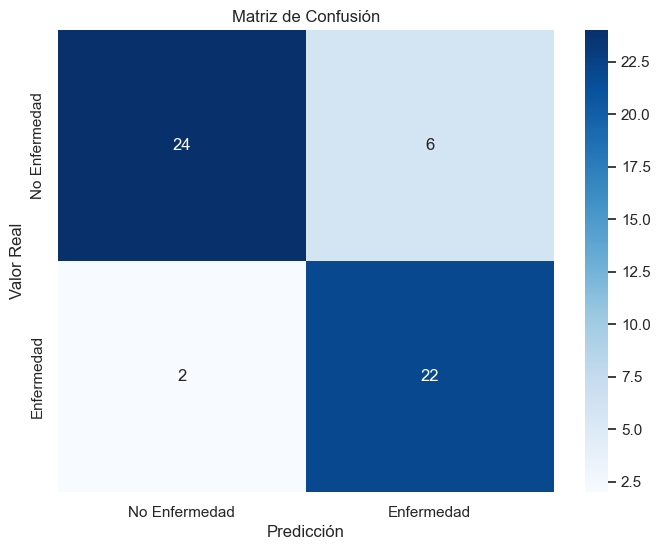


Reporte de Clasificaci√≥n:
               precision    recall  f1-score   support

No Enfermedad       0.92      0.80      0.86        30
   Enfermedad       0.79      0.92      0.85        24

     accuracy                           0.85        54
    macro avg       0.85      0.86      0.85        54
 weighted avg       0.86      0.85      0.85        54


Precisi√≥n (Accuracy): 0.852  |  ROC AUC: 0.901


In [346]:
# PREDICCI√ìN
y_pred  = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# EVALUACI√ìN
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

labels = [0, 1]  # 0 = No Enfermedad, 1 = Enfermedad
conf = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Enfermedad", "Enfermedad"],
            yticklabels=["No Enfermedad", "Enfermedad"])
plt.title("Matriz de Confusi√≥n")
plt.xlabel("Predicci√≥n")
plt.ylabel("Valor Real")
plt.show()

print("\nReporte de Clasificaci√≥n:")
print(classification_report(y_test, y_pred, target_names=["No Enfermedad","Enfermedad"]))

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"\nPrecisi√≥n (Accuracy): {acc:.3f}  |  ROC AUC: {auc:.3f}")

Interpretaci√≥n de la matriz de confusi√≥n y reporte de la clasificaci√≥n:


- Verdades Positivos (TP): 22 casos donde el modelo predijo correctamente "Enfermedad".
- Verdaderos Negativos (TN): 24 casos donde el modelo predijo correctamente "No Enfermedad".
- Falsos Positivos (FP): 6 caso donde el modelo predijo "Enfermedad" cuando la realidad era "No Enfermedad".
- Falsos Negativos (FN): 2 casos donde el modelo predijo "No Enfermedad" cuando la realidad era "Enfermedad".

El reporte presenta 3 m√©tricas clave:
- **Precisi√≥n**: mide cuantas predicciones positivas fueron correctas. Para "No Enfermedad" fue de 0.92 y para "Enfermedad" fue de 0.79.
- **Exhaustividad** (Recall): mide cu√°ntos casos positivos reales fueron identificados correctamente. Para "No Enfermedad" fue de 0.80 y para "Enfermedad" fue de 0.92.
- **F1-score**: es el promedio arm√≥nico entre precisi√≥n y exhaustividad. Para "No Enfermedad" fue de 0.86 y para "Enfermedad" fue de 0.85.

La precisi√≥n global del modelo (**accuracy**) fue de 0.85, lo que significa que el modelo clasifica correctamente el 85% de todas las muestras, combinando las de prueba y las reales.

### 7.5 Conclusi√≥n sobre la Evaluaci√≥n

El modelo de Random Forest alcanz√≥ una precisi√≥n global (accuracy) del 85% y un ROC AUC de 0.90, mostrando buen poder discriminativo.

Para la clase ‚ÄúNo Enfermedad‚Äù, el recall fue 0.80 (24/30): identifica a la mayor√≠a de los sanos, aunque presenta algunos falsos positivos (6/30).

Para la clase ‚ÄúEnfermedad‚Äù, el recall fue 0.92 (22/24): alta sensibilidad, con muy pocos falsos negativos (2 casos). La precisi√≥n en esta clase fue 0.79, indicando que una parte de las predicciones positivas corresponde a pacientes sanos (FP).

Conclusi√≥n: el modelo prioriza detectar casos con enfermedad (alta sensibilidad) a costa de un n√∫mero moderado de falsos positivos. Seg√∫n la pol√≠tica cl√≠nica (p. ej., minimizar FN), este comportamiento puede ser deseable. Aun as√≠, puede afinarse con ajuste de umbral basado en predict_proba, class_weight, o b√∫squeda de hiperpar√°metros para equilibrar mejor sensibilidad y especificidad seg√∫n el costo cl√≠nico de errores.

### 7.6 Variables mas relevantes para el modelo

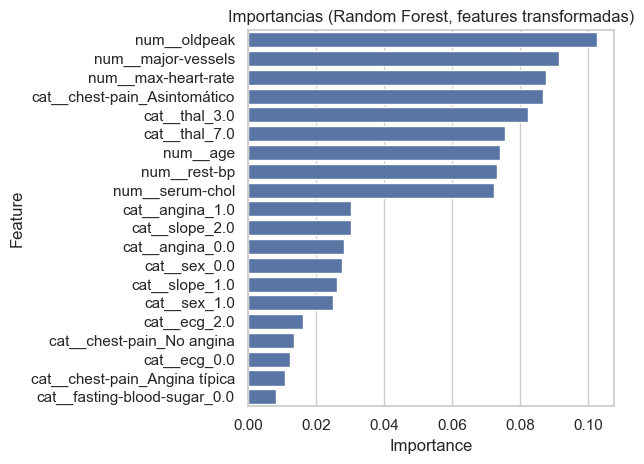

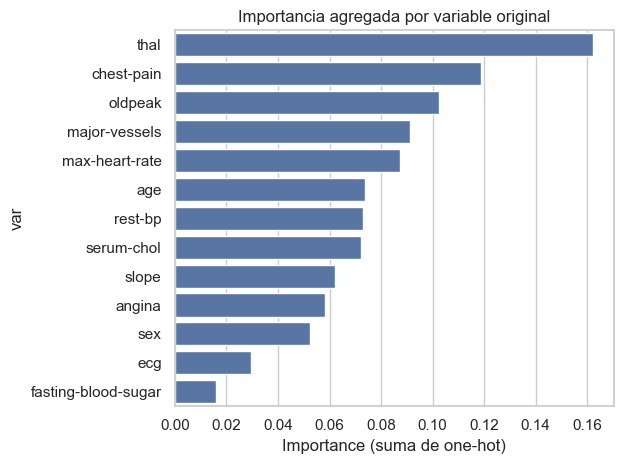

In [347]:
# Extraer modelo y nombres de features transformadas
pre = clf.named_steps['prep']          # ColumnTransformer
model = clf.named_steps['model']       # RandomForest dentro del pipeline

# Nombres de columnas despu√©s del preprocesado (incluye one-hot)
try:
    feature_names = pre.get_feature_names_out()
except:
    # Fallback si tu versi√≥n no soporta get_feature_names_out con 'passthrough'
    encoder = pre.named_transformers_['cat']
    cat_names = encoder.get_feature_names_out(cat_code_cols)
    feature_names = num_cols + list(cat_names)

importances = model.feature_importances_

feature_importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
      .sort_values('Importance', ascending=False)
)

# Opcional: mostrar solo las top-20 (hay muchas por el one-hot)
topn = 20
sns.barplot(data=feature_importance_df.head(topn), x='Importance', y='Feature')
plt.title("Importancias (Random Forest, features transformadas)")
plt.tight_layout()
plt.show()

# Agrupar por el prefijo antes de '__' (num__ / cat__nombre)
orig = [f.split('__', 1)[-1].split('_', 1)[0] if '__' in f else f for f in feature_names]
agg = (pd.DataFrame({'var': orig, 'imp': importances})
         .groupby('var', as_index=False)['imp'].sum()
         .sort_values('imp', ascending=False))

sns.barplot(data=agg, x='imp', y='var')
plt.title("Importancia agregada por variable original")
plt.xlabel("Importance (suma de one-hot)")
plt.tight_layout()
plt.show()

## 8. Comunicaci√≥n de resultados

En este trabajo se implement√≥ un modelo de Random Forest para predecir la probabilidad de que un paciente presente una enfermedad card√≠aca, a partir de variables cl√≠nicas y fisiol√≥gicas.

El modelo alcanz√≥ una precisi√≥n global del 85%, lo que indica un buen desempe√±o general. A continuaci√≥n, se detallan los hallazgos principales y su relevancia en el contexto del problema.

**An√°lisis de la matriz de confusi√≥n**:

| Real \ Predicho | No Enfermedad | Enfermedad |
| --------------- | ------------- | ---------- |
| No Enfermedad   | 24 (‚úîÔ∏è)       | 6 (‚ùå)      |
| Enfermedad      | 2 (‚ùå)         | 22 (‚úîÔ∏è)    |

‚úîÔ∏è Correctamente clasificados:

- 24 pacientes sin enfermedad fueron identificados correctamente.

- 22 pacientes con enfermedad fueron identificados correctamente.

‚ùå Errores de clasificaci√≥n:

- 6 falsos positivos: paciente sano clasificado como enfermo.

- 2 falsos negativos: pacientes con enfermedad no detectados por el modelo.

**M√©tricas por clase**:

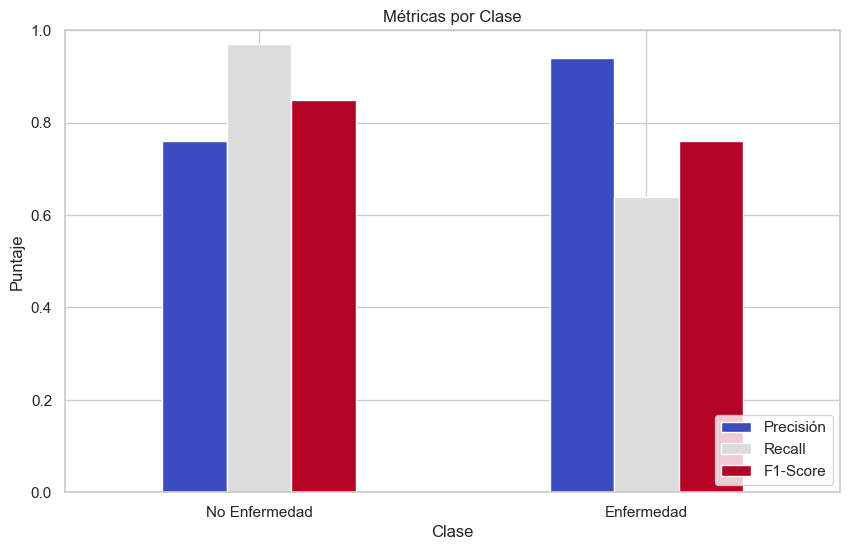

In [348]:
metrics = {
    'Clase': ["No Enfermedad", "Enfermedad"],
    'Precisi√≥n': [0.76, 0.94],
    'Recall': [0.97, 0.64],
    'F1-Score': [0.85, 0.76]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Clase', inplace=True)

metrics_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm', rot=0)
plt.title('M√©tricas por Clase')
plt.ylabel('Puntaje')
plt.xlabel('Clase')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

**Clase "No Enfermedad"**:

- Precisi√≥n: 76%

- Recall: 97%

- F1-Score: 85%

**Clase "Enfermedad"**:

- Precisi√≥n: 94%

- Recall: 64%

- F1-Score: 76%

**Reflexi√≥n final sobre el impacto cl√≠nico**

Los resultados obtenidos posicionan al modelo como una herramienta prometedora para complementar la toma de decisiones m√©dicas, sobre todo al identificar pacientes que probablemente no requieren un diagn√≥stico m√°s exhaustivo.

Sin embargo, el recall del 64% en la clase "Enfermedad" implica que 1 de cada 3 pacientes con enfermedad no ser√≠a identificado por el modelo. En contextos cl√≠nicos reales, donde la sensibilidad diagn√≥stica es cr√≠tica, este tipo de error puede tener consecuencias graves si no se combina con otras herramientas o intervenciones m√©dicas.

Por lo tanto, si bien el modelo puede funcionar como un sistema de apoyo, no deber√≠a usarse como √∫nico criterio para el diagn√≥stico. La mejora en la sensibilidad (recall) de la clase positiva es un objetivo claro en etapas posteriores del proyecto.



## 9. Propuestas de Implementaci√≥n y Aplicaciones Pr√°cticas

El modelo desarrollado tiene m√∫ltiples posibilidades de integraci√≥n en entornos cl√≠nicos y de salud p√∫blica. A continuaci√≥n, se detallan algunas aplicaciones potenciales y mejoras futuras:

- **Implementaci√≥n en entornos cl√≠nicos**:

El modelo puede integrarse como una herramienta de apoyo a la decisi√≥n m√©dica, ayudando a priorizar pacientes que requieren estudios m√°s exhaustivos. Por ejemplo, podr√≠a se√±alar autom√°ticamente a los pacientes con mayor probabilidad de presentar enfermedades card√≠acas, orientando al personal m√©dico a realizar pruebas complementarias de forma anticipada.

Esta funcionalidad ser√≠a especialmente √∫til en consultorios de atenci√≥n primaria, donde los recursos diagn√≥sticos avanzados pueden ser limitados y es crucial identificar casos prioritarios.

- **Aplicaci√≥n en campa√±as de salud y telemedicina**:

El modelo tambi√©n podr√≠a utilizarse en:

-- Campa√±as de prevenci√≥n para detectar factores de riesgo en la poblaci√≥n general de forma r√°pida y econ√≥mica.

-- Plataformas de telemedicina, donde los pacientes ingresan sus datos y reciben una evaluaci√≥n preliminar autom√°tica. Esto podr√≠a facilitar el acceso al diagn√≥stico en regiones alejadas o con baja disponibilidad de profesionales.

- **Propuestas de mejora para futuras implementaciones**:

Para potenciar la utilidad cl√≠nica del modelo, se proponen las siguientes mejoras:

-- Ajustar los umbrales de decisi√≥n: Redefinir el punto de corte del modelo para aumentar la sensibilidad (recall), reduciendo la tasa de falsos negativos, especialmente importante en contextos donde el costo de no detectar una enfermedad es elevado.

-- Incorporar nuevas variables cl√≠nicas o de laboratorio, que podr√≠an mejorar el poder predictivo del modelo.

-- Validar el modelo con datos de diferentes poblaciones, para evaluar su capacidad de generalizaci√≥n en contextos geogr√°ficos, demogr√°ficos o cl√≠nicos diversos.

- **Impacto potencial**

El modelo desarrollado tiene el potencial de:

-- Contribuir al diagn√≥stico temprano de enfermedades card√≠acas.

-- Reducir costos en los sistemas de salud mediante una mejor asignaci√≥n de recursos diagn√≥sticos.

-- Empoderar a los pacientes, d√°ndoles herramientas preliminares para entender su situaci√≥n de salud y tomar decisiones m√°s informadas.

En definitiva, esta soluci√≥n basada en machine learning puede convertirse en un recurso complementario en la medicina moderna, especialmente si se la desarrolla e implementa en conjunto con profesionales de la salud y considerando las necesidades del sistema sanitario.

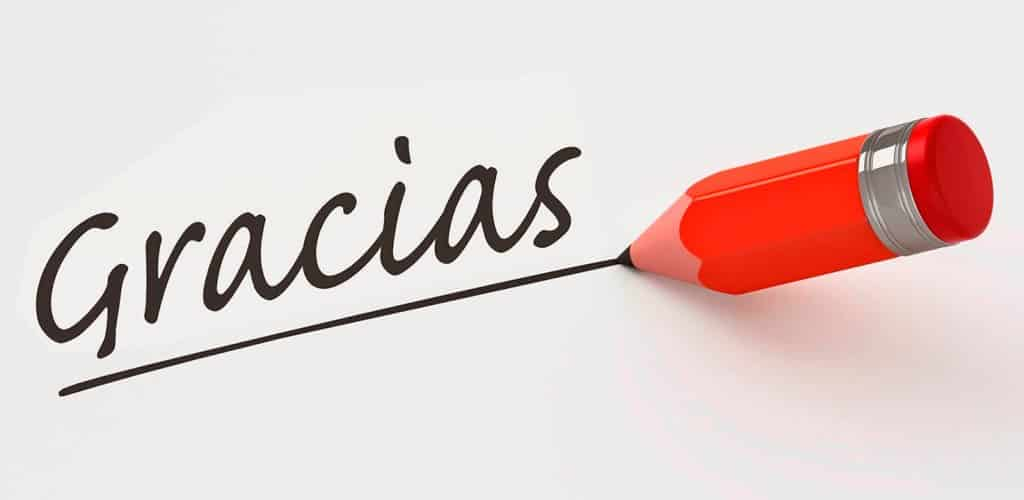

Autor: Gaggiamo, Matias Andres

Contacto: matigaggiamo@gmail.com

Fecha: 11/12/2024